problem:
To identify online payment fraud with machine learning

to do:To train a machine learning model for classifying fraudulent and non-fraudulent payments

### Importing required libraries

In [202]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [203]:
## loading required dataset
#source: kaggle-Fraud Detection

df= pd.read_csv("onlinefraud.csv")

Exploring the data

In [204]:
df.head

<bound method NDFrame.head of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1  

In [205]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


from the dataset, it can be noticed that the datset contains payments that can be flagged fraud even though it is or isnt--hence we can conclude that there may be false positives or false negatives as well

In [206]:
df.info()
#looking into datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [207]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [208]:
df.shape

(6362620, 11)

Data cleaning: checking for missioing values and any modifications required

In [209]:
print(df.isnull().sum())
#checking for nul values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [210]:
# transaction type and analysing it

print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [211]:
#figure = plt.pie(df.type.value_counts(),labels= ['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
type = df["type"].value_counts()

figure = px.pie(df, values=type.values, names= type.index, title="Distribution of Transaction Type")
figure.show()

Majority of transactions is cashed out and payments

#further analysing the data

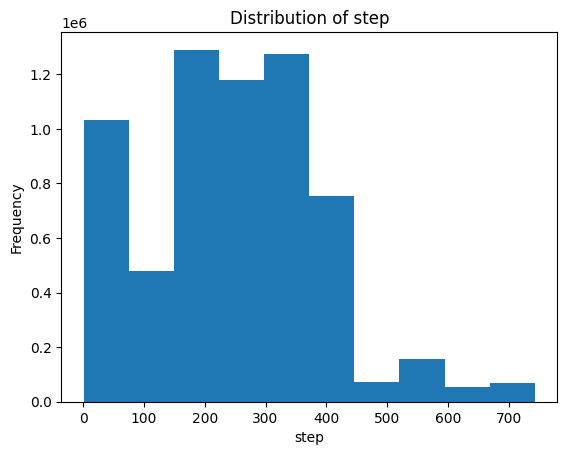

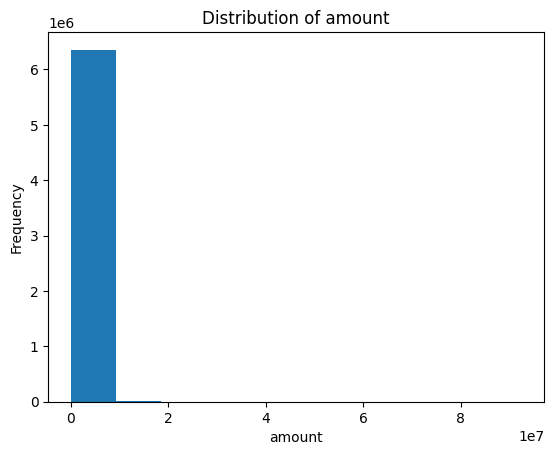

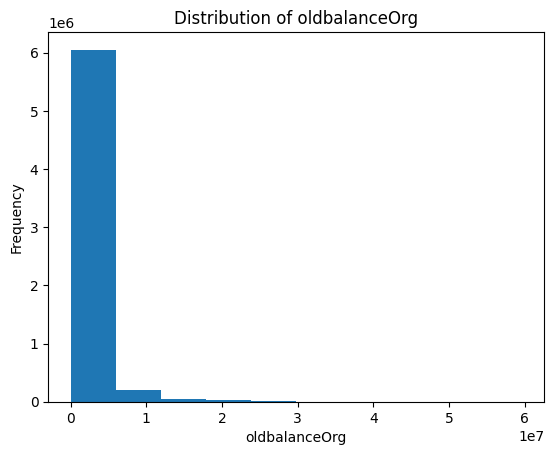

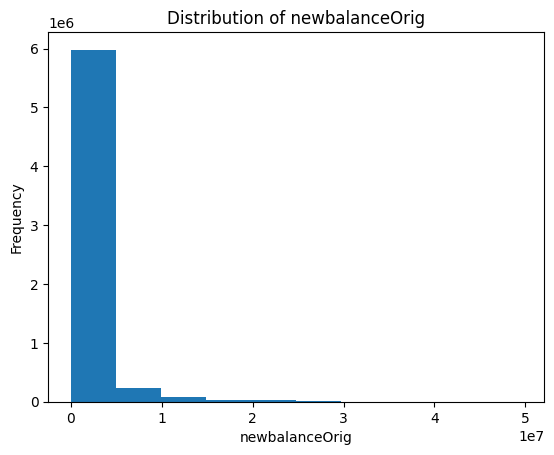

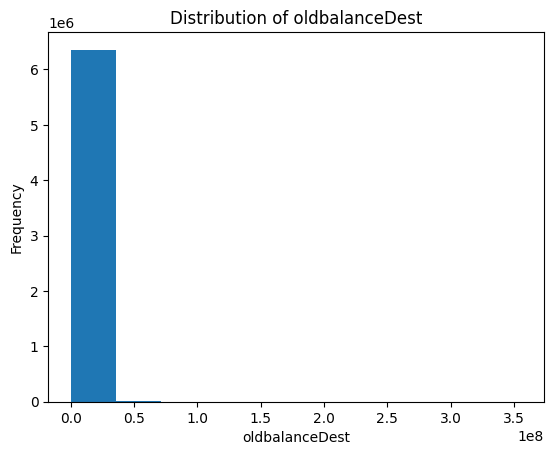

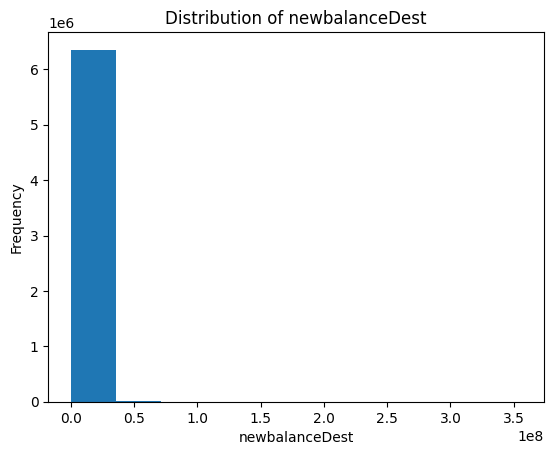

In [212]:
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist')
    plt.title(f"Distribution of {i}")
    plt.show()
    

the output seems to be skewed as we can see only 'step' values is not skewed. Let us fix the outliers

In [213]:
#verifying the skewness value
step_skew=df['step'].skew()
amount_skew=df['amount'].skew()
oldbalanceOrg_skew=df['oldbalanceOrg'].skew()
newbalanceOrig_skew=df['newbalanceOrig'].skew()
oldbalanceDest_skew=df['oldbalanceDest'].skew()
newbalanceDest_skew=df['newbalanceDest'].skew()
print(step_skew, 
      amount_skew,
     oldbalanceOrg_skew,
     newbalanceOrig_skew,
     oldbalanceDest_skew,
     newbalanceDest_skew)

0.37517688846984765 30.99394948249038 5.249136420603121 5.176884001159233 19.921757915791062 19.352302057660165


In [214]:
#fixing outliers
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




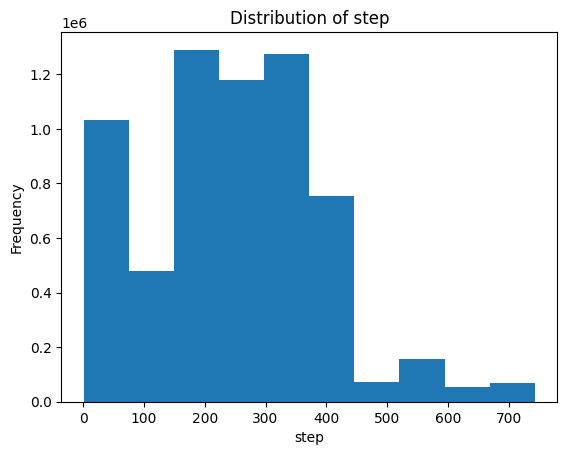

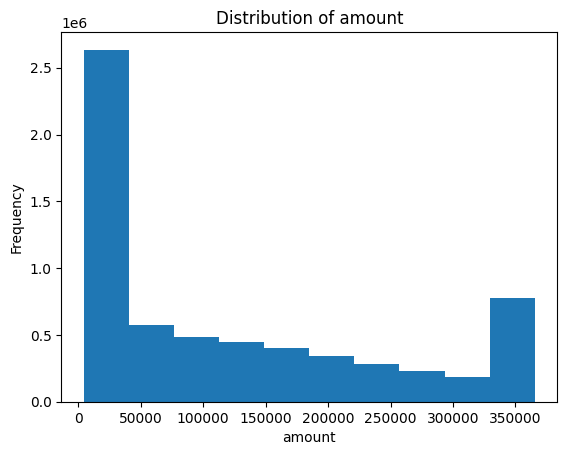

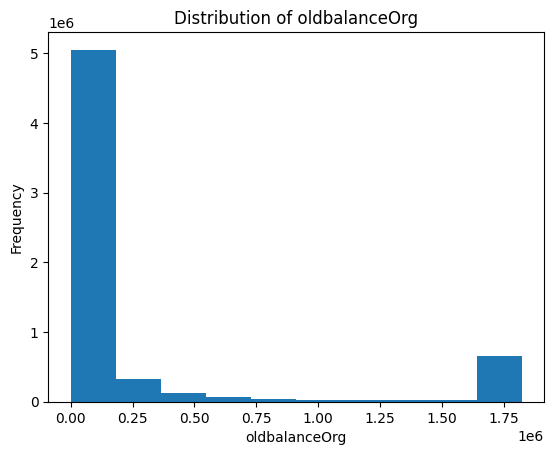

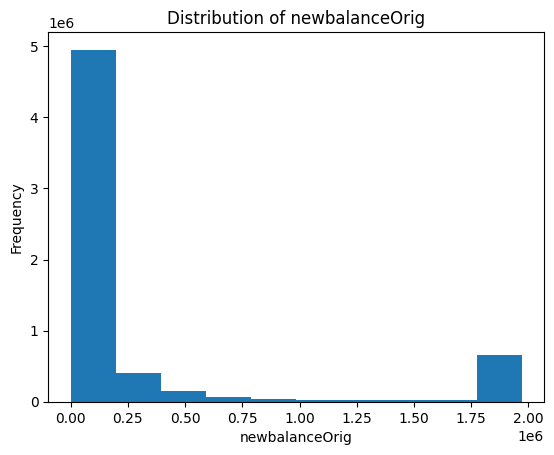

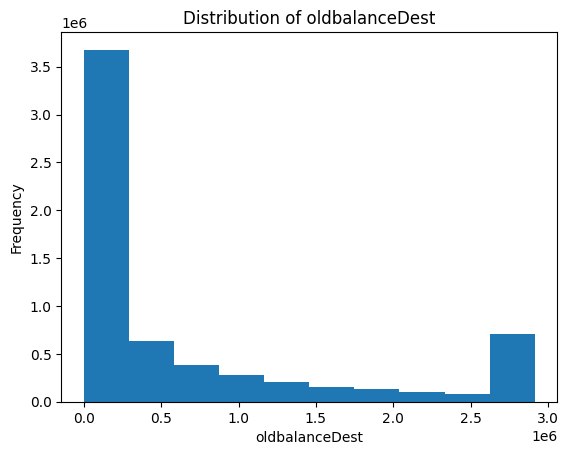

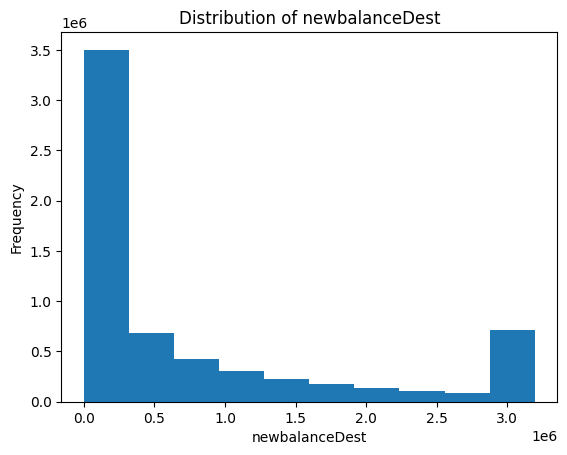

In [215]:
#okay now this looks better
# reviewing the distribution after removing outliers
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist')
    plt.title(f"Distribution of {i}")
    plt.show()

In [216]:
#Analayzing further:
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [217]:
# calculate correlation matrix
corr = df.corr()
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.007307,-0.006460,-0.006468,0.002949,-0.004029,0.031578,0.003277
amount,-0.007307,1.000000,0.090592,0.105925,0.405745,0.479862,0.039620,0.003092
oldbalanceOrg,-0.006460,0.090592,1.000000,0.988006,0.191574,0.115405,0.030947,0.003841
newbalanceOrig,-0.006468,0.105925,0.988006,1.000000,0.195563,0.108278,-0.014391,0.003795
oldbalanceDest,0.002949,0.405745,0.191574,0.195563,1.000000,0.970051,-0.012913,-0.001079
newbalanceDest,-0.004029,0.479862,0.115405,0.108278,0.970051,1.000000,-0.000797,-0.001130
isFraud,0.031578,0.039620,0.030947,-0.014391,-0.012913,-0.000797,1.000000,0.044109
isFlaggedFraud,0.003277,0.003092,0.003841,0.003795,-0.001079,-0.001130,0.044109,1.000000


<AxesSubplot:>

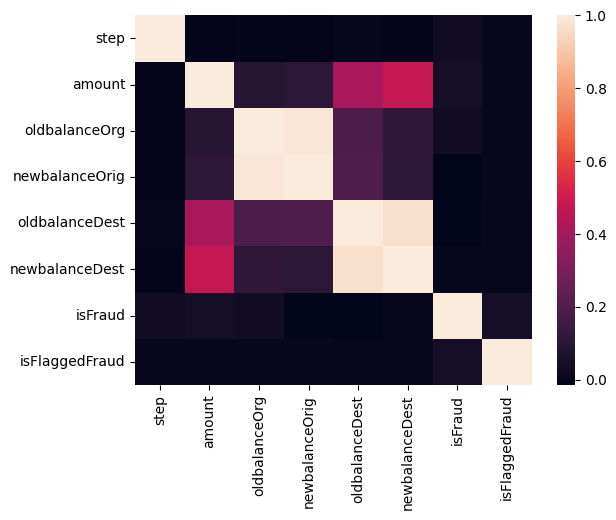

In [218]:
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, fmt=".3f")

In [219]:
# filter feature positive correlation
data = df[['type', 'amount', 'oldbalanceOrg', 'isFraud']]
data.head()

,type,amount,oldbalanceOrg,isFraud
0,PAYMENT,9839.64,170136.0,0
1,PAYMENT,4501.30,21249.0,0
2,TRANSFER,4501.30,181.0,1
3,CASH_OUT,4501.30,181.0,1
4,PAYMENT,11668.14,41554.0,0


In [220]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [221]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   type    amount  oldbalanceOrg   isFraud
0     2   9839.64       170136.0  No Fraud
1     2   4501.30        21249.0  No Fraud
2     4   4501.30          181.0     Fraud
3     1   4501.30          181.0     Fraud
4     2  11668.14        41554.0  No Fraud


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



using decision tree classifier

In [223]:
# splitting the data

x = np.array(data[["type", "amount", "oldbalanceOrg"]])
y = np.array(data[["isFraud"]])

training and tsting the model

In [224]:
# training a machine learning model

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)


In [225]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9989265428392706


In [226]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]

features = np.array([[1, 8900.2, 8990.2]])
print(model.predict(features))

['Fraud']


#Using MLPclassifier

In [227]:
# build model MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300, activation = 'relu', solver='adam', random_state=1)

In [ ]:
# training model
model.fit(xtrain, ytrain)
# predicting data testing
y_pred = model.predict(xtest)
# classification report
print(classification_report(y_pred, ytest, target_names=['No Fraud', 'Fraud']))

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

